Task 3 Mall Customer Segmentation:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
data = pd.read_csv("/content/Mall_Customers.csv")
data

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [ ]:
data.shape

(200, 5)

In [ ]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#Now scale the features
X=data[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Here we train our model to learn from data and divide data into groups without any labels which called customer segmentation.

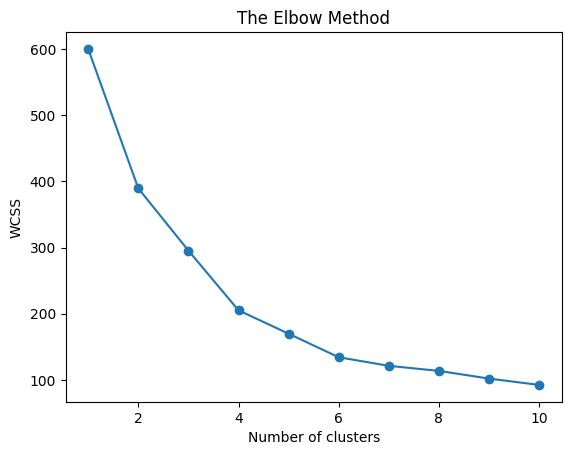

In [ ]:
#For Optimal Clustor
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

plt.plot(range(1 ,11), wcss, marker = 'o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Based on graph we would use 4 clustering because from 4 the graph is bending down
kmeans = KMeans(n_clusters = 4,init='k-means++',random_state=42 )
data['Cluster'] = kmeans.fit_predict(X_scaled)
display(data)

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster  
0          2  
1          2  
2          2  
3          2  
4          2  
..       ...  
195        1  
196        3  
197        1  
198        3  
199        1  

[200 rows x 6 columns]

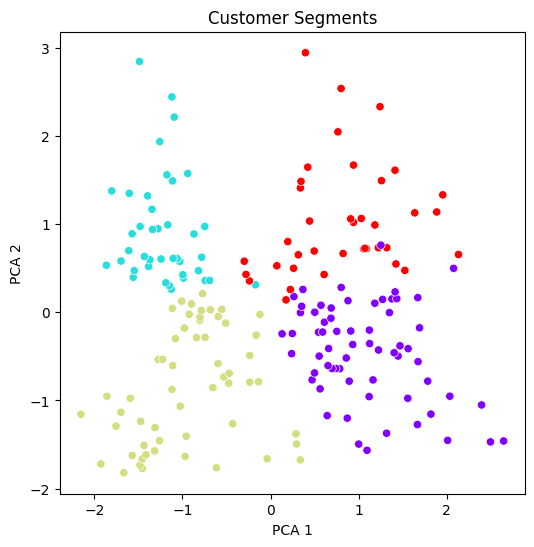

In [ ]:
#2D Visualizaing to analyze mean characteristics of each group
pca_model = PCA(n_components=2)
reduced = pca_model.fit_transform(X_scaled)

plt.figure(figsize=(6,6))
sns.scatterplot(x=reduced[:,0],y=reduced[:,1],c=data['Cluster'], cmap= 'rainbow')
plt.title('Customer Segments')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [ ]:
#Average values of each clusters
data.groupby('Cluster')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        53.984615           47.707692               39.969231
1        32.875000           86.100000               81.525000
2        25.438596           40.000000               60.298246
3        39.368421           86.500000               19.578947

Above:

1.   0_Cluster = the Elderly Custoemrs,moderate income and not vary active in spending.
2.   1_Cluster = A group of Best Customers for marketing.
3.  2_Cluster = A group of Budget Shoppers( Very Young,Low income,Average    spemders).
4. 3_Cluster = Rich But less interested in spending(Middle age, high income, low spending).


In [ ]:
#To know about new customer groups
new_customer = [[23, 38, 40]] #Age,Income,Spending score

cluster_label = kmeans.predict((new_customer))
print("New customer belongs to cluster:", cluster_label[0])

New customer belongs to cluster: 1
